# Exercise 14 – Introduction to Correlation Coefficients

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

We will be working with the dataset from a survey conducted from the school on Quantitative Reasoning students. Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

In [1]:
survey <- read.csv("C:/Users/User/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 10 - Calculating Correlations/survey.csv")

In [3]:
str(survey)

'data.frame':	213 obs. of  9 variables:
 $ gender     : Factor w/ 3 levels "Female","Male",..: 1 3 1 1 1 1 2 2 2 2 ...
 $ nationality: Factor w/ 3 levels "Non-Singaporean",..: 3 1 3 1 1 1 1 1 3 1 ...
 $ height     : num  164 178 170 167 163 160 172 177 NA 186 ...
 $ phone      : int  42 63 22 94 41 60 53 12 72 NA ...
 $ facebook   : int  NA 7 27 33 185 10 27 0 NA 212 ...
 $ youtube    : num  8.90e+04 4.50e+04 1.10e+06 2.44e+05 1.79e+08 ...
 $ shoe       : num  37 28.7 25.4 39 39 23.9 28 28 24.7 29.4 ...
 $ postcode   : num  1 3 1 0 NA 4 1 0 1 0 ...
 $ boxoffice  : num  7.91e+07 2.58e+08 2.88e+07 6.15e+07 3.55e+08 ...


In [4]:
head(survey)

gender,nationality,height,phone,facebook,youtube,shoe,postcode,boxoffice
Female,Singaporean,164,42,NA,89000,37.0,1,79097104
Neither,Non-Singaporean,178,63,7,45000,28.7,3,257620288
Female,Singaporean,170,22,27,1100000,25.4,1,28815245
Female,Non-Singaporean,167,94,33,244153,39.0,0,61459425
Female,Non-Singaporean,163,41,185,178667673,39.0,NA,355467056
Female,Non-Singaporean,160,60,10,6370000,23.9,4,199


## Step 1: Check for missing values 

In [5]:
table(is.na(survey$height))


FALSE  TRUE 
  209     4 

In [6]:
table(is.na(survey$shoe))


FALSE  TRUE 
  207     6 

## Step 2: Calculate Correlation Manually

Since there are missing values in our variables that can cause issues when calculating the correlation coefficient, let's create a new data frame that omits the NA values

In [7]:
# REMOVE NA VALUES IN THE DATAFRAME SURVEY

survey.narm <-na.omit(survey[, c('height', 'shoe')])

In [8]:
# CHECK THAT THE NA ROWS HAVE BEEN REMOVED

nrow(survey.narm)
nrow(survey)

[1] 205

[1] 213

In [9]:
# CALCULATE MEAN OF HEIGHT

height_mean <- mean(survey.narm$height)
height_mean

[1] 168.3309

In [10]:
# CALCULATE MEAN OF SHOE

shoe_mean <- mean(survey.narm$shoe)
shoe_mean

[1] 27.68415

In [11]:
# CALCULATE SD OF HEIGHT

height_sd <- sd(survey.narm$height)
height_sd

[1] 9.005957

In [12]:
# CALCULATE SD OF SHOE

shoe_sd <- sd(survey.narm$shoe)
shoe_sd

[1] 4.173487

In [13]:
# CHECK THAT THERE ARE NO NA VALUES IN EACH SECTION

sum(!is.na(survey.narm$height))
sum(!is.na(survey.narm$shoe))

[1] 205

[1] 205

In [14]:
# MANUAL WAY OF CALCULATING CORRELATION
ManualCorCoef1 <- sum((survey.narm$height - height_mean) * (survey.narm$shoe - shoe_mean) / 
    (height_sd * shoe_sd)) / 
    (nrow(survey.narm) - 1)

ManualCorCoef1

# SIMPLER WAY OF CALCULATING

survey.narm$heightZ <- (survey.narm$height - height_mean)/height_sd # CALCULATE Z SCORE OF HEIGHT
survey.narm$shoeZ <- (survey.narm$shoe - shoe_mean)/shoe_sd # CALCULATE Z SCORE OF SHOE

ManualCorCoef2 <- sum(survey.narm$heightZ * survey.narm$shoeZ) / (nrow(survey.narm) - 1)
ManualCorCoef2

[1] 0.1736641

[1] 0.1736641

In [15]:
# AUTOMATIC WAY OF CALCULATING CORRELATION
r <- cor(survey$height, survey$shoe, use = "complete.obs")
r

[1] 0.1736641

## Step 3: Calculate Various Correlations

In [16]:
cor(survey$height, survey$shoe, use = "complete.obs")
cor(survey$shoe, survey$height, use = "complete.obs")

[1] 0.1736641

[1] 0.1736641

They turn out to be the same.

## Step 4: Plot scatterplot of Height and Shoe Size 

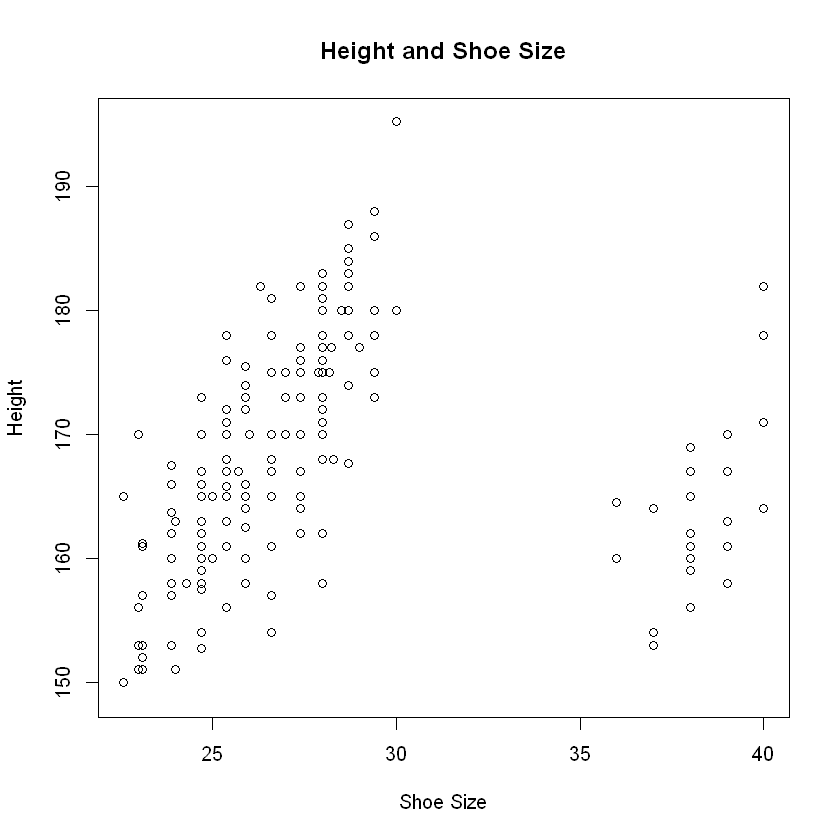

In [17]:
plot(height ~ shoe, 
    data = survey,
    main = "Height and Shoe Size",
    ylab = "Height",
    xlab = "Shoe Size")

We asked to report shoe size in centimetres (not EU)

Thus, it looks like outliers might have come from respondents who did not read the directions closely when they completed the survey. The outliers are thus presumably errors.

Generate a new scatter plot for height and shoe
- Make sure it excludes the outliers (i.e. shoe > 35)
- With the outliers excluded, recalculate the correlation

In [18]:
r_outlier <- cor(survey$height[survey$shoe < 35], survey$shoe[survey$shoe < 35], use = "complete.obs")
r_outlier

[1] 0.7820226

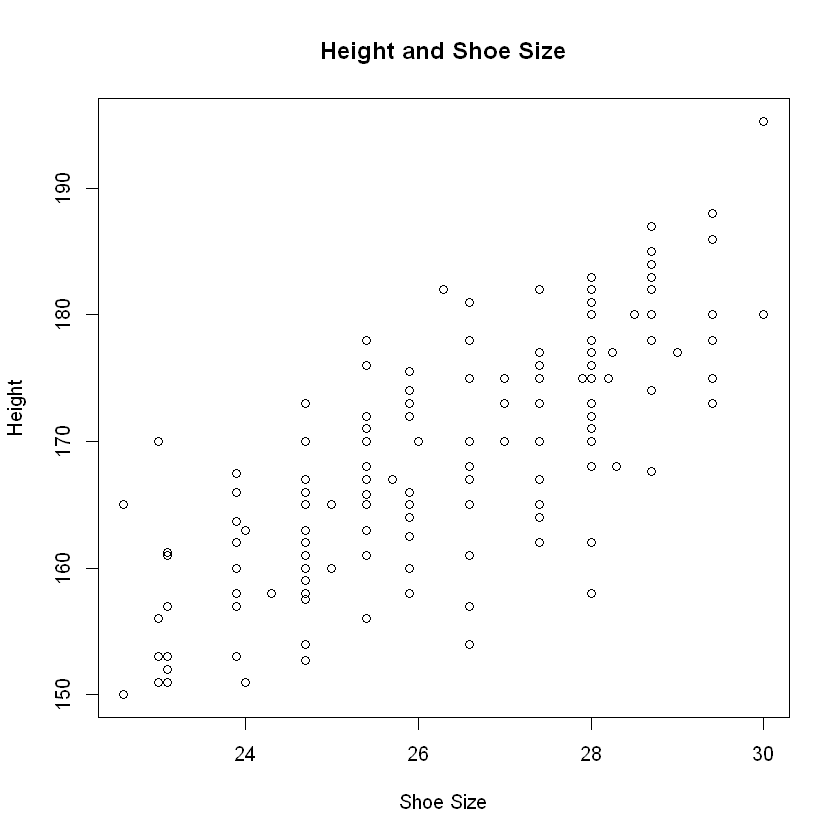

In [19]:
# Remove the outliers

plot(height[survey$shoe < 35] ~ shoe[survey$shoe < 35], 
     data = survey,
    main = "Height and Shoe Size",
    xlab = "Shoe Size",
    ylab = "Height")

## Step 5: Transform variables and replot variables

What happens to the correlation when we transform the variables, for example, by adding or subtracting a numeric value to height and shoe? Let’s see.

Create a pair of new variables of 
- height_subX OR height_plusX and 
- shoe_subY OR shoe_plusY 
that take the following values. Append them to the data frame. Choose your own values of X and Y.

Now working together with your peers, do the following in R:

- Create a scatter plot for new variables for height and shoe.
- Make sure to exclude the outliers (i.e. shoe > 35)
- With the outliers excluded, recalculate the correlation for the new variables for height and shoe.

In [20]:
x <- survey

x$height_sub5 <- x$height - 5
x$shoe_plus10 <- x$shoe + 10

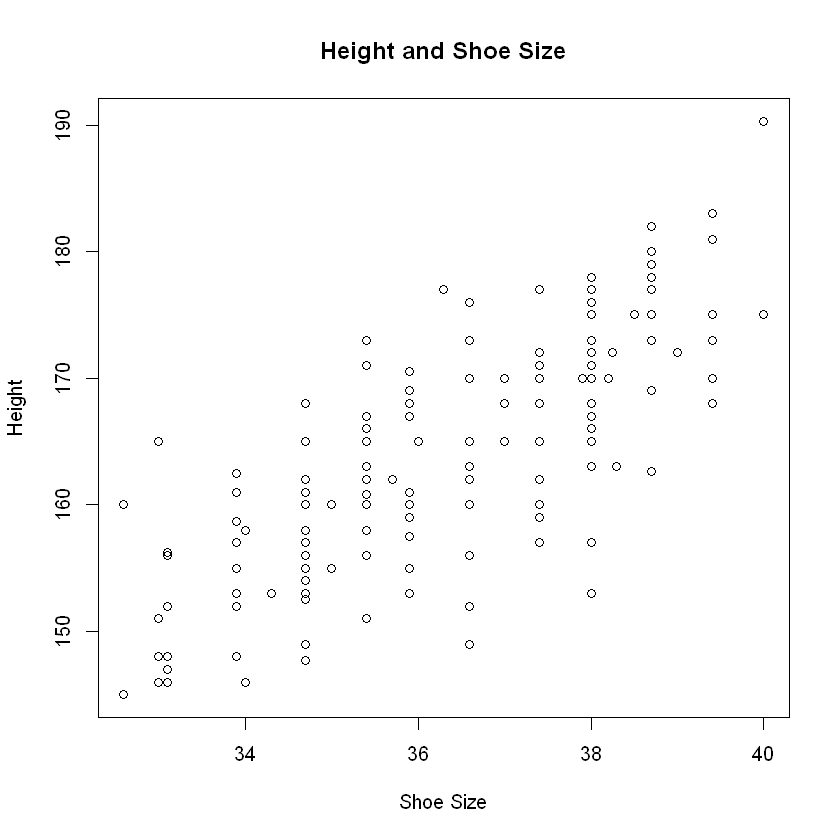

In [21]:
plot(x$height_sub5[x$shoe < 35] ~ x$shoe_plus10[x$shoe < 35],
     main = "Height and Shoe Size",
     xlab = "Shoe Size",
     ylab = "Height")

In [22]:
r_outlier_plus <- cor(x$height_sub5[x$shoe < 35], x$shoe_plus10[x$shoe < 35], use = "complete.obs")
r_outlier_plus

r_outlier

[1] 0.7820226

[1] 0.7820226

## Step 6: Multiply or divide height and shoe by a constant

What happens to the correlation when we transform the variables, for example, by multiplying or dividing height and shoe by a constant? Let’s see by converting height and shoe (measured in centimetres) into inches.

In [23]:
x$height_inches <- x$height / 2.54

x$shoe_inches <- x$shoe / 2.54

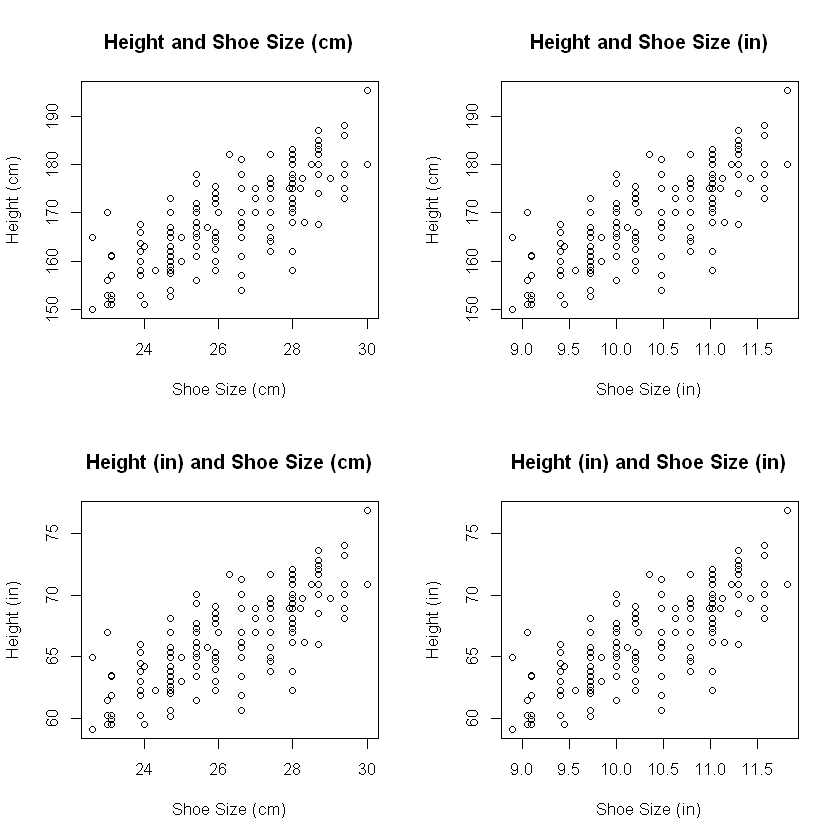

In [24]:
par(mfrow = c(2,2))

# PLOT HEIGHT BY SHOE

plot(height[x$shoe < 35] ~ shoe[x$shoe < 35],
    data = x,
    main = "Height and Shoe Size (cm)",
    xlab = "Shoe Size (cm)",
    ylab = "Height (cm)")

# PLOT HEIGHT BY SHOE INCHES

plot(height[x$shoe < 35] ~ shoe_inches[x$shoe < 35],
    data = x,
    main = "Height and Shoe Size (in)",
    xlab = "Shoe Size (in)",
    ylab = "Height (cm)")

# PLOT HEIGHT INCHES BY SHOE

plot(height_inches[x$shoe < 35] ~ shoe[x$shoe < 35],
    data = x,
    main = "Height (in) and Shoe Size (cm)",
    xlab = "Shoe Size (cm)",
    ylab = "Height (in)")

# PLOT HEIGHT INCHES BY SHOE INCHES

plot(height_inches[x$shoe < 35] ~ shoe_inches[x$shoe < 35],
    data = x,
    main = "Height (in) and Shoe Size (in)",
    xlab = "Shoe Size (in)",
    ylab = "Height (in)")


In [25]:
r_outlier_in <- cor(x$height_inches[x$shoe < 35], x$shoe_inches[x$shoe < 35], use = "complete.obs")
r_outlier_in

[1] 0.7820226

Now find the log transformed variables and the correlation of it.

In [26]:
x <- survey.narm

x$height_log <- log(x$height, 10)

x$shoe_log <- log(x$shoe, 10)

r_outlier_log_log <- cor(x$height_log[x$shoe < 35], x$shoe_log[x$shoe < 35])
print(paste("r_outlier_log_log is", r_outlier_log_log))

print(paste("r_outlier is", r_outlier))

r_log_log <- cor(x$height_log, x$shoe_log)
print(paste("r_log_log is", r_log_log))

print(paste("r correlation is", r)) 

[1] "r_outlier_log_log is 0.780642885104771"
[1] "r_outlier is 0.782022612816589"
[1] "r_log_log is 0.229473886812648"
[1] "r correlation is 0.173664067314719"


## Step 7: Find Histograms and Scatter Plots

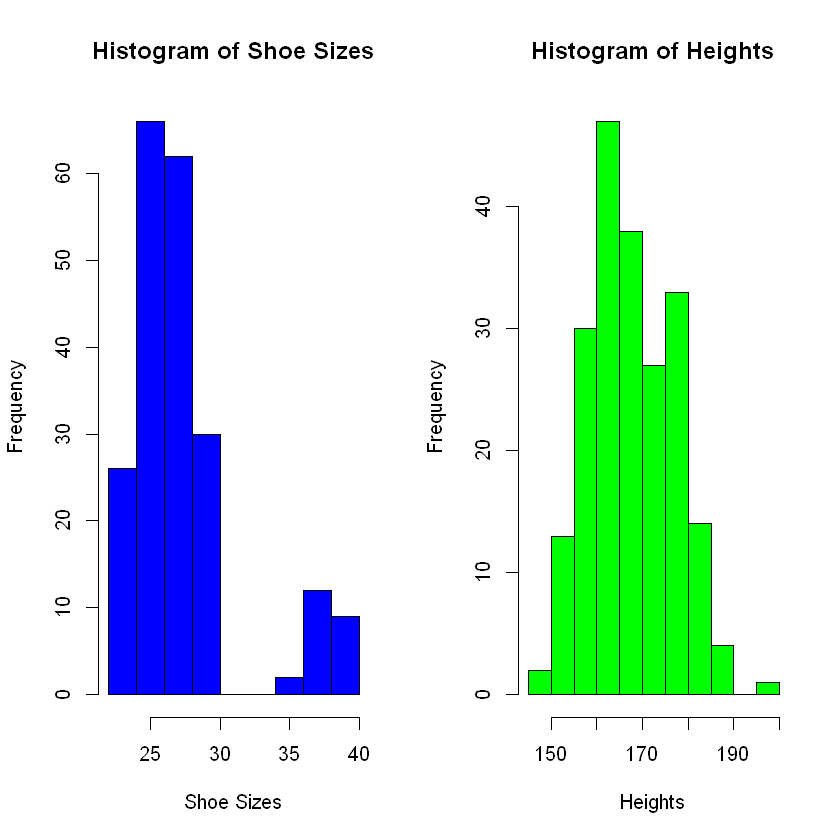

In [27]:
par(mfrow = c(1,2))

hist(survey$shoe, 
     main = "Histogram of Shoe Sizes",
    xlab = "Shoe Sizes",
    col = "blue")

hist(survey$height,
    main = "Histogram of Heights",
    xlab = "Heights",
    col = "green")

par(mfrow = c(1,1))

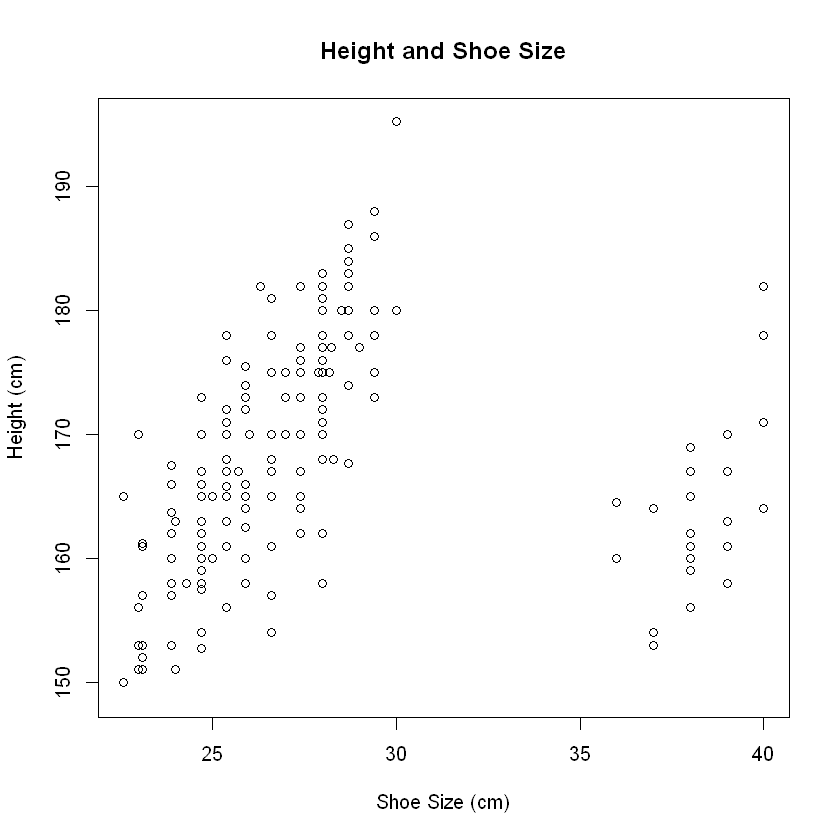

In [28]:
plot(height~shoe, data=survey,
main="Height and Shoe Size",
ylab="Height (cm)",
xlab="Shoe Size (cm)")

## Step 8: Find the Linear Regression of height against shoe

In [29]:
lm_hs <- lm(height ~ shoe, data=survey)
lm_hs


Call:
lm(formula = height ~ shoe, data = survey)

Coefficients:
(Intercept)         shoe  
   157.9563       0.3747  


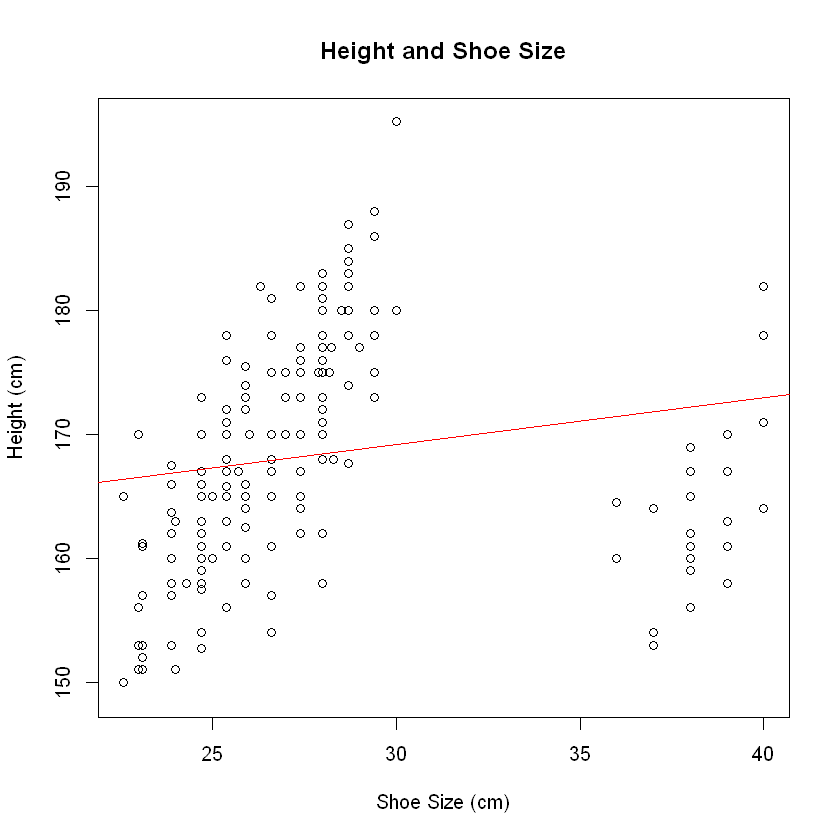

In [30]:
plot(height~shoe, data=survey,
main="Height and Shoe Size",
ylab="Height (cm)",
xlab="Shoe Size (cm)")

# LINE OF BEST FIT
abline(lm_hs, col="red")


In [31]:
lm_hs_main <- lm( height ~ shoe, data=survey[survey$shoe<35,])
lm_hs_main


Call:
lm(formula = height ~ shoe, data = survey[survey$shoe < 35, ])

Coefficients:
(Intercept)         shoe  
     67.830        3.835  


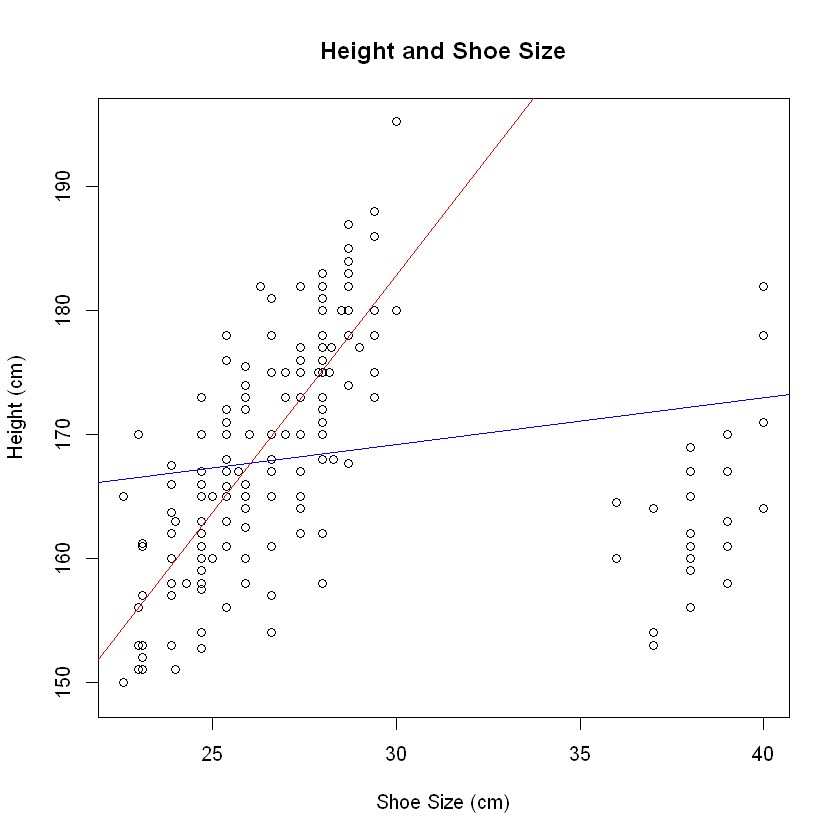

In [32]:
plot(height~shoe, data=survey,
main="Height and Shoe Size",
ylab="Height (cm)",
xlab="Shoe Size (cm)")

# NEW LINE OF BEST FIT
abline(lm_hs_main, col="red") 

# OLD LINE OF BEST FIT
abline(lm_hs, col="blue")